# Rede neural artificial no sklearn
- Submodulo da sklearn: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neural_network    

In [1]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
import numpy as np
from sklearn import datasets
import sklearn.metrics as skmet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt 

# Problema de classificação:
- Dataset:

In [2]:
cancer = datasets.load_breast_cancer()
print(cancer["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [3]:
X_train, X_test, y_train, y_test = train_test_split(cancer["data"], cancer["target"], test_size=0.25, random_state=8, )
X_train.shape, X_test.shape

((426, 30), (143, 30))

## MLPClassifier
- https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

In [6]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), activation='relu', solver='sgd', alpha=0.0001, 
                    batch_size=30, max_iter=500, shuffle=True, random_state=10, tol=0.0001, 
                    verbose=True)

mlp_pipe = Pipeline([('scaler', StandardScaler()), ('MLP', mlp)])

- Treinando:

In [7]:
mlp_pipe.fit(X_train, y_train)

Iteration 1, loss = 0.76810544
Iteration 2, loss = 0.72710829
Iteration 3, loss = 0.68428135
Iteration 4, loss = 0.64551949
Iteration 5, loss = 0.60890937
Iteration 6, loss = 0.57274253
Iteration 7, loss = 0.53663346
Iteration 8, loss = 0.50133219
Iteration 9, loss = 0.46734431
Iteration 10, loss = 0.43268931
Iteration 11, loss = 0.40046730
Iteration 12, loss = 0.36985537
Iteration 13, loss = 0.34231216
Iteration 14, loss = 0.31758668
Iteration 15, loss = 0.29543623
Iteration 16, loss = 0.27609708
Iteration 17, loss = 0.25899601
Iteration 18, loss = 0.24403636
Iteration 19, loss = 0.23059656
Iteration 20, loss = 0.21911221
Iteration 21, loss = 0.20840999
Iteration 22, loss = 0.19933339
Iteration 23, loss = 0.19058204
Iteration 24, loss = 0.18270482
Iteration 25, loss = 0.17569109
Iteration 26, loss = 0.16904997
Iteration 27, loss = 0.16305654
Iteration 28, loss = 0.15747745
Iteration 29, loss = 0.15243864
Iteration 30, loss = 0.14757834
Iteration 31, loss = 0.14285880
Iteration 32, los

Pipeline(steps=[('scaler', StandardScaler()),
                ('MLP',
                 MLPClassifier(batch_size=30, hidden_layer_sizes=(10, 5),
                               max_iter=500, random_state=10, solver='sgd',
                               verbose=True))])

- Fazendo a predição:

In [8]:
y_hat = mlp_pipe.predict(X_test)

- Calculando a matriz de confusão:

In [9]:
skmet.confusion_matrix(y_test, y_hat)

array([[55,  3],
       [ 1, 84]])

- Obtendo o relatório de classificação:

In [10]:
print(skmet.classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.97      0.99      0.98        85

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



# Problema de regressão

- Dataset

In [11]:
califa = datasets.fetch_california_housing()
print(califa["DESCR"])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

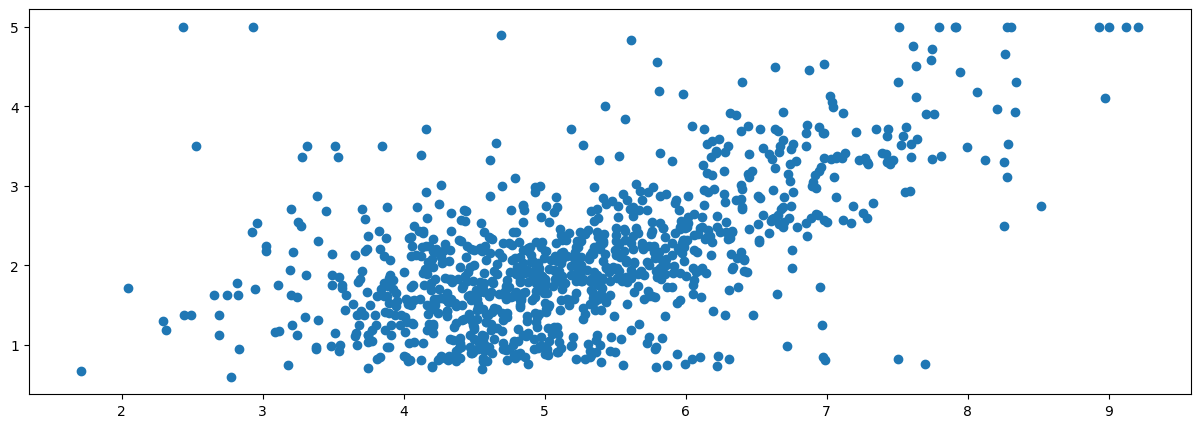

In [12]:
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(califa["data"][:1000, 2], califa["target"][:1000])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(califa["data"], califa["target"], test_size=0.25, random_state=8)
X_train.shape, X_test.shape

((15480, 8), (5160, 8))

## MLPRegression
- https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor

In [14]:
mlp = MLPRegressor(hidden_layer_sizes=(10,), activation='relu', solver='sgd', alpha=0.0001, 
                    batch_size=30, max_iter=200, shuffle=True, random_state=10, tol=0.0001, 
                    verbose=True)

mlp_pipe = Pipeline([('scaler', StandardScaler()), ('MLP', mlp)])

- Treinando:

In [15]:
mlp_pipe.fit(X_train, y_train)

Iteration 1, loss = 0.54190251
Iteration 2, loss = 0.29941867
Iteration 3, loss = 0.26146668
Iteration 4, loss = 0.24559299
Iteration 5, loss = 0.24081490
Iteration 6, loss = 0.23469837
Iteration 7, loss = 0.22514680
Iteration 8, loss = 0.22428549
Iteration 9, loss = 0.22170758
Iteration 10, loss = 0.21864897
Iteration 11, loss = 0.21666674
Iteration 12, loss = 0.21438282
Iteration 13, loss = 0.21292765
Iteration 14, loss = 0.21163008
Iteration 15, loss = 0.20837204
Iteration 16, loss = 0.20767248
Iteration 17, loss = 0.20565560
Iteration 18, loss = 0.20449279
Iteration 19, loss = 0.20529488
Iteration 20, loss = 0.20300791
Iteration 21, loss = 0.20065632
Iteration 22, loss = 0.20201834
Iteration 23, loss = 0.19798729
Iteration 24, loss = 0.19708243
Iteration 25, loss = 0.19570473
Iteration 26, loss = 0.19447670
Iteration 27, loss = 0.19455930
Iteration 28, loss = 0.19610965
Iteration 29, loss = 0.19602709
Iteration 30, loss = 0.19206717
Iteration 31, loss = 0.19488417
Iteration 32, los

Pipeline(steps=[('scaler', StandardScaler()),
                ('MLP',
                 MLPRegressor(batch_size=30, hidden_layer_sizes=(10,),
                              random_state=10, solver='sgd', verbose=True))])

- Realizando predição:

In [16]:
y_hat = mlp_pipe.predict(X_test)

- Calculando erros:

In [17]:
skmet.mean_absolute_error(y_test, y_hat)

0.4131319464654206

In [18]:
skmet.mean_squared_error(y_test, y_hat)

0.34103554940637315

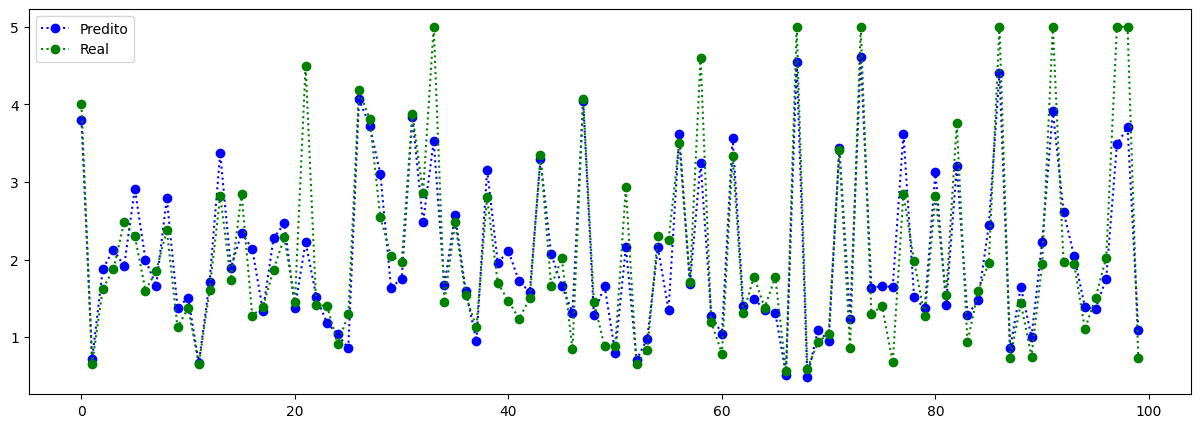

In [19]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(y_hat[0:100], marker="o", linestyle="dotted", label="Predito", color="b")
ax.plot(y_test[0:100], marker="o", linestyle="dotted", label="Real", color="g")
ax.legend()

# Exercícios
1. Ajuste o treshold de classificação para, se possível, zerar os falsos negativos
2. Gerar o pairplot usando seaborn pra ver variação dos dados no problema da regressão
3. Utilizar o o método `partial_fit()` para gerar as curvas de aprendizado e acompanhar a evolução do aprendizado para ambos os problemas
4. Tentar aumentar o tamanho da rede e manipular os parâmetros para obter uma predição melhor para o problema de regressão

1)

In [27]:
# Carregar o dataset de câncer de mama
cancer = datasets.load_breast_cancer()

# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(cancer["data"], cancer["target"], test_size=0.25, random_state=8)

# Definir e treinar o modelo
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), activation='relu', solver='sgd', alpha=0.0001, 
                    batch_size=30, max_iter=500, shuffle=True, random_state=10, tol=0.0001, 
                    verbose=False)
mlp_pipe = Pipeline([('scaler', StandardScaler()), ('MLP', mlp)])
mlp_pipe.fit(X_train, y_train)

# Fazer a predição
y_prob = mlp_pipe.predict_proba(X_test)[:, 1]
threshold = 0.05  # Ajuste do threshold
y_hat = (y_prob >= threshold).astype(int)

# Calcular a matriz de confusão e o relatório de classificação
confusion_matrix = skmet.confusion_matrix(y_test, y_hat)
classification_report = skmet.classification_report(y_test, y_hat)

print("Matriz de Confusão:\n", confusion_matrix)
print("Relatório de Classificação:\n", classification_report)

Matriz de Confusão:
 [[52  6]
 [ 0 85]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        58
           1       0.93      1.00      0.97        85

    accuracy                           0.96       143
   macro avg       0.97      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143



Vemos que ajustando o *threshold* para 5% zeramos o números de Falsos Negativos. Ou seja, *Precision* = 1.

2)

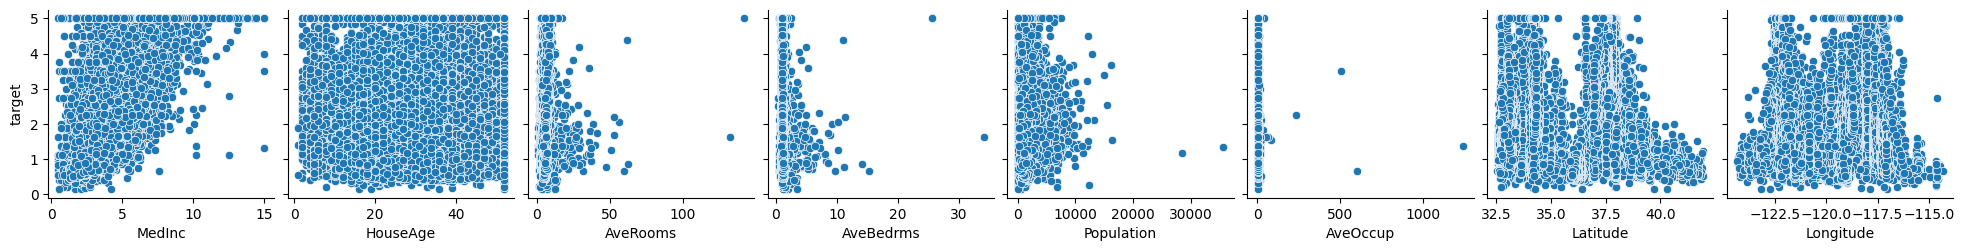

In [28]:
import seaborn as sns
import pandas as pd

# Carregar o dataset de habitação da Califórnia
califa = datasets.fetch_california_housing()

# Converter o dataset para um DataFrame do Pandas
df = pd.DataFrame(califa["data"], columns=califa["feature_names"])
df["target"] = califa["target"]

# Gerar o pairplot
sns.pairplot(df, y_vars=["target"], x_vars=califa["feature_names"])
plt.show()


3)

Classificação

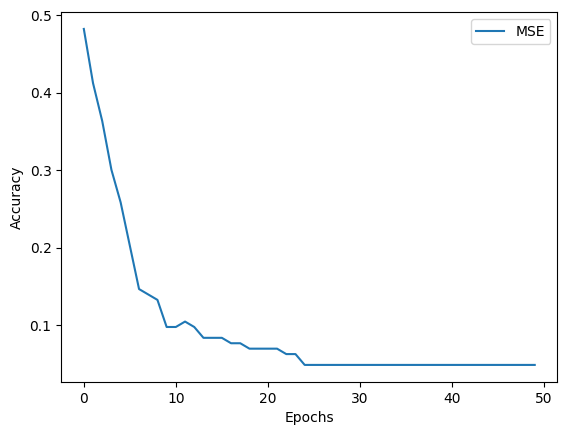

In [32]:
from sklearn.metrics import mean_squared_error

# Carregar o dataset de câncer de mama
cancer = datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer["data"], cancer["target"], test_size=0.25, random_state=8)

# Escalar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Inicializar o modelo
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), activation='relu', solver='sgd', alpha=0.0001, 
                    batch_size=30, max_iter=1, shuffle=True, random_state=10, tol=0.0001, 
                    verbose=False, warm_start=True)

# Listas para armazenar as métricas
mse = []

# Treinar usando partial_fit
mlp.partial_fit(X_train, y_train, classes=np.unique(y_train))
for _ in range(50):
    mlp.partial_fit(X_train, y_train)
    y_test_pred = mlp.predict(X_test)
    mse.append(mean_squared_error(y_true=y_test, y_pred=y_test_pred))

# Plotar as curvas de aprendizado
plt.plot(mse, label="MSE")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Regressão

Early stoping activated at Epochs = 47


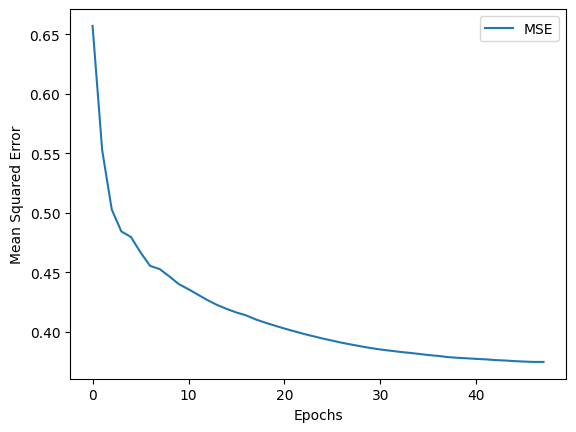

In [43]:
from sklearn.neural_network import MLPRegressor
from sklearn import datasets
import sklearn.metrics as skmet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Carregar o dataset de habitação da Califórnia
califa = datasets.fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(califa["data"], califa["target"], test_size=0.25, random_state=8)

# Escalar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Inicializar o modelo
mlp = MLPRegressor(hidden_layer_sizes=(10,), activation='relu', solver='sgd', alpha=0.0001, 
                    batch_size=30, max_iter=1, shuffle=True, random_state=10, tol=0.0001, 
                    verbose=False, warm_start=True)

# Listas para armazenar as métricas
test_errors =  []

# Treinar usando partial_fit
for i in range(1000):
    mlp.partial_fit(X_train, y_train)
    y_test_pred = mlp.predict(X_test)
    test_errors.append(skmet.mean_squared_error(y_test, y_test_pred))

    # Aplicando early stoping
    if(i > 0 and (test_errors[i-1] - test_errors[i]) < 0.0001 ):
        print(f"Early stoping activated at Epochs = {i}")
        break

# Plotar as curvas de aprendizado
plt.plot(test_errors, label="MSE")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()


4)

Iteration 1, loss = 0.36339083
Iteration 2, loss = 0.19420400
Iteration 3, loss = 0.18062298
Iteration 4, loss = 0.16836610
Iteration 5, loss = 0.16358841
Iteration 6, loss = 0.16973241
Iteration 7, loss = 0.15683313
Iteration 8, loss = 0.15004449
Iteration 9, loss = 0.14843622
Iteration 10, loss = 0.14491195
Iteration 11, loss = 0.14686356
Iteration 12, loss = 0.14516853
Iteration 13, loss = 0.14058222
Iteration 14, loss = 0.13894626
Iteration 15, loss = 0.14358465
Iteration 16, loss = 0.13691386
Iteration 17, loss = 0.13913889
Iteration 18, loss = 0.13457914
Iteration 19, loss = 0.13423159
Iteration 20, loss = 0.13408379
Iteration 21, loss = 0.13388542
Iteration 22, loss = 0.13228704
Iteration 23, loss = 0.13146595
Iteration 24, loss = 0.13142508
Iteration 25, loss = 0.13042070
Iteration 26, loss = 0.12927958
Iteration 27, loss = 0.12947680
Iteration 28, loss = 0.12722024
Iteration 29, loss = 0.12715156
Iteration 30, loss = 0.12644687
Iteration 31, loss = 0.12532908
Iteration 32, los

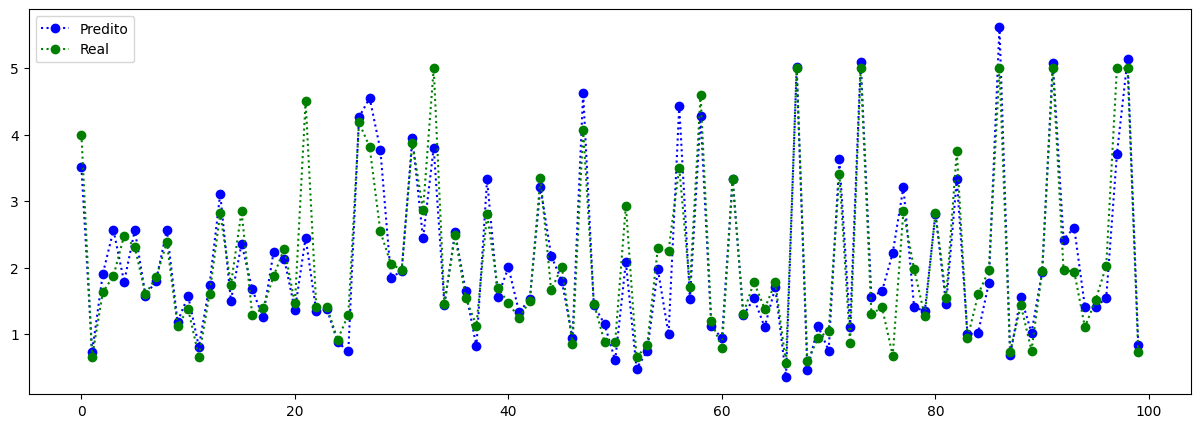

In [44]:
# Definir e treinar o modelo com uma rede maior
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', alpha=0.0001, 
                    batch_size=30, max_iter=500, shuffle=True, random_state=10, tol=0.0001, 
                    verbose=True)
mlp_pipe = Pipeline([('scaler', StandardScaler()), ('MLP', mlp)])
mlp_pipe.fit(X_train, y_train)

# Realizar predição
y_hat = mlp_pipe.predict(X_test)

# Calcular erros
mae = skmet.mean_absolute_error(y_test, y_hat)
mse = skmet.mean_squared_error(y_test, y_hat)
print("MAE:", mae)
print("MSE:", mse)

# Plotar predições
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(y_hat[0:100], marker="o", linestyle="dotted", label="Predito", color="b")
ax.plot(y_test[0:100], marker="o", linestyle="dotted", label="Real", color="g")
ax.legend()
plt.show()
